In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import acquire
import prepare

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler

In [2]:
# Cleaned Data for Exploration
df = acquire.get_telco_data(cached = True)
train, validate, test = prepare.prep_telco_data(df)

In [4]:
churn_rate = train.churn.mean()

Text(0.5, 0, 'Churn')

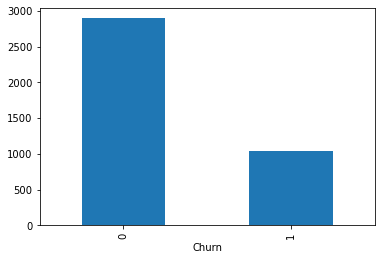

In [5]:
train.churn.value_counts().plot.bar()
plt.xlabel('Churn')

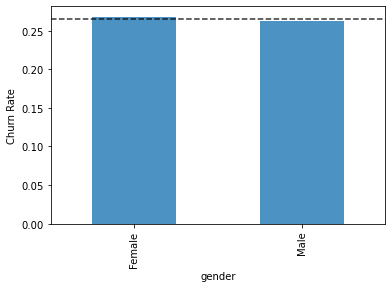

In [6]:
train.groupby('gender').churn.mean().plot.bar(alpha=.8)
plt.ylabel('Churn Rate')
plt.hlines(churn_rate, *plt.xlim(), ls='--', alpha=.8)

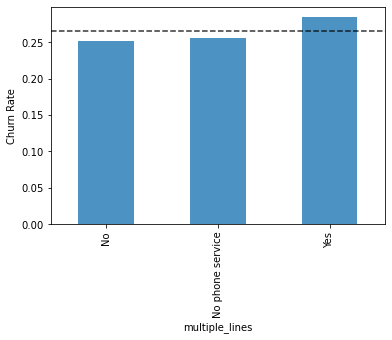

In [7]:
train.groupby('multiple_lines').churn.mean().plot.bar(alpha=.8)
plt.ylabel('Churn Rate')
plt.hlines(churn_rate, *plt.xlim(), ls='--', alpha=.8)

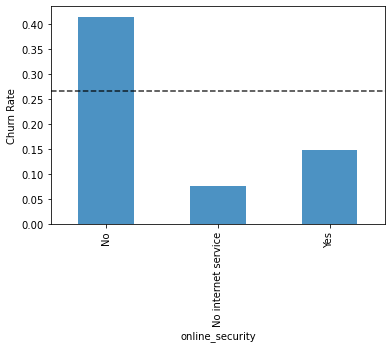

In [11]:
train.groupby('online_security').churn.mean().plot.bar(alpha=.8)
plt.ylabel('Churn Rate')
plt.hlines(churn_rate, *plt.xlim(), ls='--', alpha=.8)

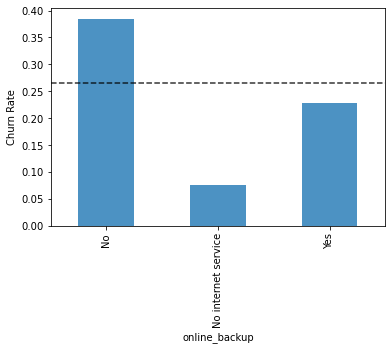

In [12]:
train.groupby('online_backup').churn.mean().plot.bar(alpha=.8)
plt.ylabel('Churn Rate')
plt.hlines(churn_rate, *plt.xlim(), ls='--', alpha=.8)

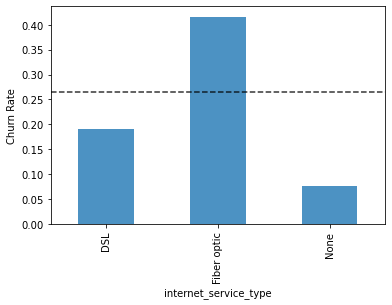

In [13]:
train.groupby('internet_service_type').churn.mean().plot.bar(alpha=.8)
plt.ylabel('Churn Rate')
plt.hlines(churn_rate, *plt.xlim(), ls='--', alpha=.8)

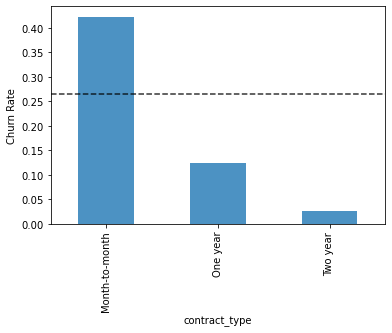

In [14]:
train.groupby('contract_type').churn.mean().plot.bar(alpha=.8)
plt.ylabel('Churn Rate')
plt.hlines(churn_rate, *plt.xlim(), ls='--', alpha=.8)

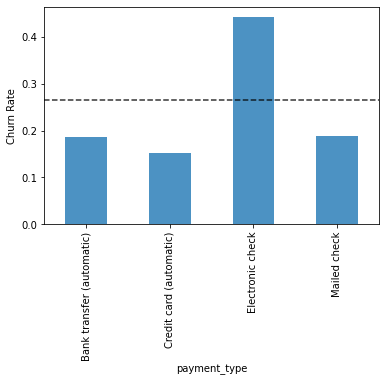

In [15]:
train.groupby('payment_type').churn.mean().plot.bar(alpha=.8)
plt.ylabel('Churn Rate')
plt.hlines(churn_rate, *plt.xlim(), ls='--', alpha=.8)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3943 entries, 5670 to 6867
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 3943 non-null   object 
 1   senior_citizen         3943 non-null   int64  
 2   partner                3943 non-null   int64  
 3   dependents             3943 non-null   int64  
 4   tenure                 3943 non-null   int64  
 5   phone_service          3943 non-null   int64  
 6   multiple_lines         3943 non-null   object 
 7   online_security        3943 non-null   object 
 8   online_backup          3943 non-null   object 
 9   device_protection      3943 non-null   object 
 10  tech_support           3943 non-null   object 
 11  streaming_tv           3943 non-null   object 
 12  streaming_movies       3943 non-null   object 
 13  paperless_billing      3943 non-null   int64  
 14  monthly_charges        3943 non-null   float64
 15  t

In [16]:
pd.crosstab(train.churn, train.payment_type)

payment_type,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
churn,,,,
0,700,706,741,750
1,160,126,587,173


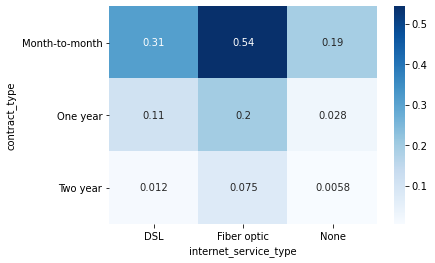

In [18]:
sns.heatmap(train.pivot_table('churn', 'contract_type', 'internet_service_type'), cmap='Blues', annot=True)

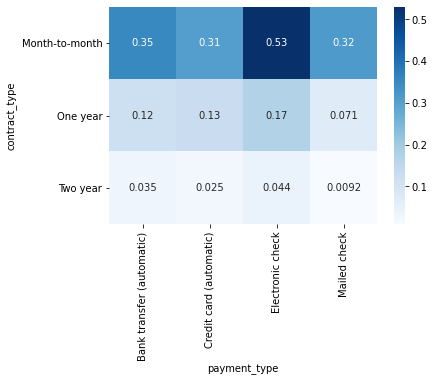

In [5]:
sns.heatmap(train.pivot_table('churn', 'contract_type', 'payment_type'), cmap='Blues', annot=True)

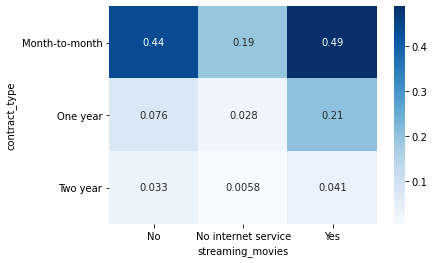

In [7]:
sns.heatmap(train.pivot_table('churn', 'contract_type', 'streaming_movies'), cmap='Blues', annot=True)

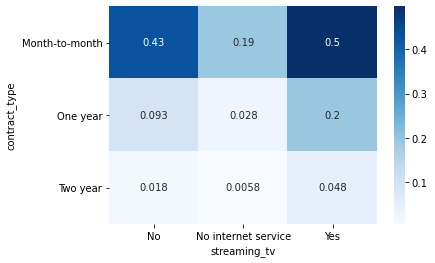

In [8]:
sns.heatmap(train.pivot_table('churn', 'contract_type', 'streaming_tv'), cmap='Blues', annot=True)

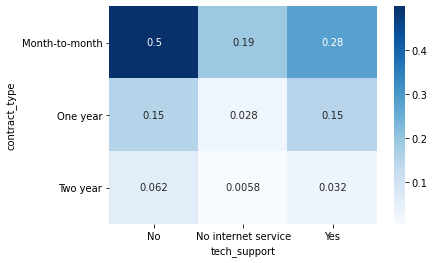

In [9]:
sns.heatmap(train.pivot_table('churn', 'contract_type', 'tech_support'), cmap='Blues', annot=True)

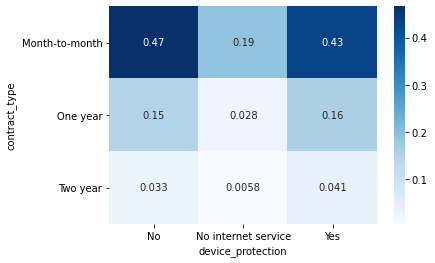

In [10]:
sns.heatmap(train.pivot_table('churn', 'contract_type', 'device_protection'), cmap='Blues', annot=True)

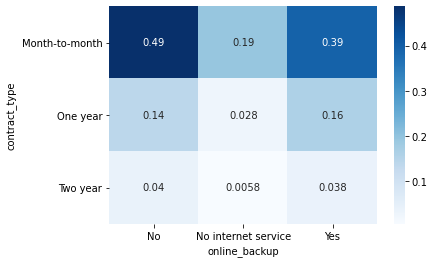

In [11]:
sns.heatmap(train.pivot_table('churn', 'contract_type', 'online_backup'), cmap='Blues', annot=True)

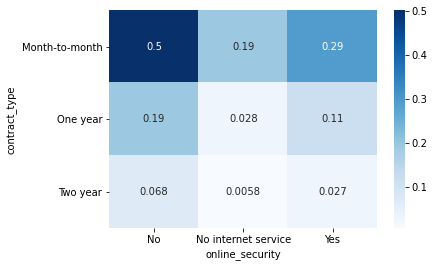

In [12]:
sns.heatmap(train.pivot_table('churn', 'contract_type', 'online_security'), cmap='Blues', annot=True)

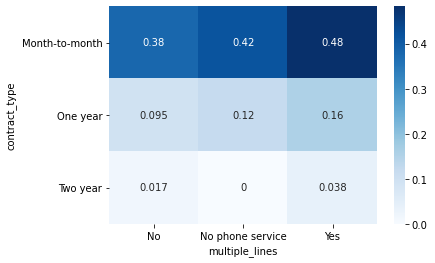

In [13]:
sns.heatmap(train.pivot_table('churn', 'contract_type', 'multiple_lines'), cmap='Blues', annot=True)

## Observations
 - In month to month contracts correlation between churn and multiple phone lines(0.48)
 - In month to month contracts correlation between churn and no online security (0.5)
 - In month to month contracts correlation between churn and no tech support (0.5)
 - In month to month contracts correlation between churn and electronic check payment type (0.53)
 - In month to month contracts correlation between churn and fiber optic internet service (0.54)

In [ ]:
#titanic = acquire.get_titanic_data(cached=True)

In [ ]:
#train, validate, test = prepare.prep_titanic(titanic)

In [ ]:
#train.info()

In [ ]:
#validate.info()

In [ ]:
#test.info()

# Messing around with titanic data for exploratory data analysis

In [ ]:
df = acquire.get_titanic_data(cached=True)
train, validate, test = prepare.prep_titanic(df)

train = train[['survived', 'pclass', 'sex', 'age', 'fare', 'embark_town', 'alone']]

train.head()

In [ ]:
survival_rate = train.survived.mean()

In [ ]:
train.survived.value_counts().plot.bar()
plt.xlabel('Survived')

In [ ]:
train.groupby('sex').survived.mean().plot.bar(alpha=.8)
plt.ylabel('Survival Rate')
plt.hlines(survival_rate, *plt.xlim(), ls='--', alpha=.8)

In [ ]:
train.groupby('alone').survived.mean().plot.bar(alpha=.8)
plt.ylabel('Survival Rate')
plt.hlines(survival_rate, *plt.xlim(), ls='--', alpha=.8)

In [ ]:
# Exploring 2 categorical variables, but now we're treating survived as a category, not a number.
pd.crosstab(train.survived, train.sex)

In [ ]:
pd.crosstab(train.survived, train.alone)

In [ ]:
train.groupby('survived').age.describe()

In [ ]:
train.groupby('survived').fare.describe()

In [ ]:
plt.figure(figsize=(13, 7))
sns.swarmplot(data=train, y='sex', x='age', hue='survived')

# Messing around with the TELCO project dataset

In [ ]:
# We need to import data from SQL
# Connect to employees database
#defines function to create a sql url using personal credentials

from env import host, user, password

def get_db_url(database, user=user, host=host, password=password): 
    url = f'mysql+pymysql://{user}:{password}@{host}/{database}'
    return url

url = get_db_url('telco_churn')

query = '''
select * 
from customers as c
join contract_types as ct
on ct.contract_type_id = c.contract_type_id
join internet_service_types as i_s
on i_s.internet_service_type_id = c.internet_service_type_id
join payment_types as pt
on pt.payment_type_id = c.payment_type_id;
'''
df = pd.read_sql(query, url)

In [ ]:
#Cleaned Data

# Delete columns 'customer_id', contract_type_id, internet_service_type_id, payment_type_id    
df.drop(columns = ['customer_id','contract_type_id','internet_service_type_id', 'payment_type_id'], inplace = True)
# Replace partner, dependents, churn, phone_service, paperless billing, with boolean value
df.partner.replace(['Yes', 'No'], [1,0], inplace = True)
df.dependents.replace(['Yes', 'No'], [1,0], inplace = True)
df.churn.replace(['Yes', 'No'], [1,0], inplace = True)
df.phone_service.replace(['Yes', 'No'], [1,0], inplace = True)
df.paperless_billing.replace(['Yes', 'No'], [1,0], inplace = True)
# Add dummy variables as new columns in dataframe and rename them, delete origional
gender = df.gender.str.get_dummies()
df = pd.concat([df, gender], axis=1)
df.rename(columns = {'Female': 'is_female', 'Male': 'is_male'}, inplace = True)
df.drop(columns = ['gender'], inplace = True)
# Add dummy variables as new columns in dataframe and rename them, delete origional
multiple = df.multiple_lines.str.get_dummies()
df = pd.concat([df, multiple], axis=1)
df.rename(columns = {'No': 'no_multiple_lines', 'Yes': 'yes_multiple_lines'}, inplace = True)
df.drop(columns = ['multiple_lines'], inplace = True)
# Add dummy variables as new columns in dataframe and rename them, delete origional
multiple = df.online_security.str.get_dummies()
df = pd.concat([df, multiple], axis=1)
df.rename(columns = {'No': 'no_online_security', 'Yes': 'yes_online_security'}, inplace = True)
df.drop(columns = ['online_security'], inplace = True)
# Add dummy variables as new columns in dataframe and rename them, delete origional
multiple = df.online_backup.str.get_dummies()
df = pd.concat([df, multiple], axis=1)
df.rename(columns = {'No': 'no_online_backup', 'Yes': 'yes_online_backup'}, inplace = True)
df.drop(columns = ['online_backup'], inplace = True)
# Add dummy variables as new columns in dataframe and rename them, delete origional
multiple = df.device_protection.str.get_dummies()
df = pd.concat([df, multiple], axis=1)
df.rename(columns = {'No': 'no_device_protection', 'Yes': 'yes_device_protection'}, inplace = True)
df.drop(columns = ['device_protection'], inplace = True)
# Add dummy variables as new columns in dataframe and rename them, delete origional
multiple = df.tech_support.str.get_dummies()
df = pd.concat([df, multiple], axis=1)
df.rename(columns = {'No': 'no_tech_support', 'Yes': 'yes_tech_support'}, inplace = True)
df.drop(columns = ['tech_support'], inplace = True)
# Add dummy variables as new columns in dataframe and rename them, delete origional
multiple = df.streaming_tv.str.get_dummies()
df = pd.concat([df, multiple], axis=1)
df.rename(columns = {'No': 'no_streaming_tv', 'Yes': 'yes_streaming_tv'}, inplace = True)
df.drop(columns = ['streaming_tv', 'No internet service'], inplace = True)
# Add dummy variables as new columns in dataframe and rename them, delete origional
multiple = df.streaming_movies.str.get_dummies()
df = pd.concat([df, multiple], axis=1)
df.rename(columns = {'No': 'no_streaming_movies', 'Yes': 'yes_streaming_movies'}, inplace = True)
df.drop(columns = ['streaming_movies'], inplace = True)
# Add dummy variables as new columns in dataframe and rename them, delete origional
multiple = df.contract_type.str.get_dummies()
df = pd.concat([df, multiple], axis=1)
df.rename(columns = {'Month-to-month': 'month_to_month_contract', 'One year': 'one_year_contract', 'Two year': 'two_year_contract'}, inplace = True)
df.drop(columns = ['contract_type'], inplace = True)
# Add dummy variables as new columns in dataframe and rename them, delete origional
multiple = df.internet_service_type.str.get_dummies()
df = pd.concat([df, multiple], axis=1)
df.rename(columns = {'DSL': 'dsl', 'Fiber optic': 'fiber_optic'}, inplace = True)
df.drop(columns = ['internet_service_type','None'], inplace = True)
# Add dummy variables as new columns in dataframe and rename them, delete origional
multiple = df.payment_type.str.get_dummies()
df = pd.concat([df, multiple], axis=1)
df.rename(columns = {'Bank transfer (automatic)': 'auto_bank_transfer', 'Credit card (automatic)': 'auto_credit_card', 'Electronic check': 'e_check', 'Mailed check': 'mail_check'}, inplace = True)
df.drop(columns = ['payment_type'], inplace = True)
# Change total_charges to float from object
df['total_charges'] = pd.to_numeric(df['total_charges'],errors='coerce')

In [ ]:
df.info()

In [ ]:
'''
Things to Consider:
1. How to handle colums that could be booleans (Yes/No/Null)
   -Keep as object or turn to int ?
   -Columns include '''
   
  

''' contract_type
    
2. Total charges change to float, it is currently an object
3. Delete origional dummy variable columns
'''

In [ ]:
# dummy multiple lines

df